# MODELIZACIÓN PARA CLASIFICACIÓN

**OBSERVACIÓN**    
En este notebook se ha realizado la modelización para la selección de variables.     
En el anterior, la modelización con todas las variables.

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import pickle

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score

from sklearn.metrics import classification_report


from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Alfonso/OneDrive/Documentos_/Formación/Bootcamp_DS/Repo_DS/Proyect_Break_ML/Proyecto_ML/00_PROYECTO_ML'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_final.pickle'
nombre_y = 'y_final.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [6]:
ratio = float(np.sum(train_y == 0)) / np.sum(train_y == 1)
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
          'algoritmo__solver': ['saga'],
          'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
          'algoritmo__C': [0,0.25,0.5,0.75,1],
          'algoritmo__class_weight': ['balanced']},
        
        # {'algoritmo': [RandomForestClassifier()],
        #  'algoritmo__n_jobs': [-1],
        #  'algoritmo__max_depth': [5,10,15],
        #  'algoritmo__n_estimators': [50,100,200],
        #  'algoritmo__class_weight': ['balanced']},
        
        # {'algoritmo': [XGBClassifier()],
        #  'algoritmo__n_jobs': [-1],
        #  'algoritmo__verbosity': [0],#para que no salgan warnings
        #  'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
        #  'algoritmo__max_depth': [5,10,20],
        #  'algoritmo__reg_alpha': [0,0.1,0.5,1],
        #  'algoritmo__reg_lambda': [0.01,0.1,1],
        #  'algoritmo__n_estimators': [100,500,1000],
        #  'algoritmo__scale_pos_weight': [ratio]},
        
         {'algoritmo': [LGBMClassifier(verbose =-1)],
         'algoritmo__max_depth': [2,4, 6],
         'algoritmo__min_child_samples': [2,4,8],
         'algoritmo__min_child_weight': [5,10,15],
         'algoritmo__learning_rate': [0.01,0.04,0.08],
         'algoritmo__n_estimators': [100,200,300],
         'algoritmo__is_unbalance' : [True],
         'algoritmo__objective': ['binary'],
         #'algoritmo__class_weight': ['balanced'],
          }
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [7]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv =5, 
                           scoring = make_scorer(recall_score, pos_label=1),
                           verbose = 1,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

Fitting 5 folds for each of 263 candidates, totalling 1315 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__class_weight,param_algoritmo__penalty,param_algoritmo__solver,param_algoritmo__is_unbalance,...,param_algoritmo__objective,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.01,0.00,0.01,0.00,LogisticRegression(),1,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.88,0.69,0.72,0.59,0.72,0.72,0.09,1
14,0.01,0.00,0.01,0.00,LogisticRegression(),0.75,balanced,l2,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.91,0.62,0.72,0.59,0.72,0.71,0.11,2
182,0.13,0.01,0.01,0.00,LGBMClassifier(verbose=-1),NaN,NaN,NaN,NaN,True,...,binary,"{'algoritmo': LGBMClassifier(verbose=-1), 'alg...",0.84,0.62,0.69,0.66,0.75,0.71,0.08,2
17,0.02,0.00,0.01,0.00,LogisticRegression(),1,balanced,l1,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.88,0.69,0.69,0.59,0.72,0.71,0.09,2
13,0.02,0.00,0.01,0.00,LogisticRegression(),0.75,balanced,l1,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.88,0.69,0.69,0.59,0.72,0.71,0.09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.00,0.00,0.00,0.00,LogisticRegression(),0.75,balanced,none,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,252
16,0.00,0.00,0.00,0.00,LogisticRegression(),1,balanced,elasticnet,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,252
19,0.00,0.00,0.00,0.00,LogisticRegression(),1,balanced,none,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,252
8,0.00,0.00,0.00,0.00,LogisticRegression(),0.50,balanced,elasticnet,saga,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,252


In [8]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)
df_cv_results[['param_algoritmo','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_algoritmo,mean_test_score,std_test_score,rank_test_score
18,LogisticRegression(),0.72,0.09,1
14,LogisticRegression(),0.71,0.11,2
182,LGBMClassifier(verbose=-1),0.71,0.08,2
17,LogisticRegression(),0.71,0.09,2
13,LogisticRegression(),0.71,0.09,2
...,...,...,...,...
15,LogisticRegression(),NaN,NaN,252
16,LogisticRegression(),NaN,NaN,252
19,LogisticRegression(),NaN,NaN,252
8,LogisticRegression(),NaN,NaN,252


In [9]:
grid_search.best_params_

{'algoritmo': LogisticRegression(),
 'algoritmo__C': 1,
 'algoritmo__class_weight': 'balanced',
 'algoritmo__penalty': 'l2',
 'algoritmo__solver': 'saga'}

## EVALUAR

### Predecir sobre validación

In [11]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [12]:
roc_auc_score(val_y, pred)

0.8281105457909343

### Classification report

In [13]:
# Obtienes las predicciones de clase final
pred_final = modelo.best_estimator_.predict(val_x)

print(classification_report(val_y,pred_final))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       376
           1       0.41      0.74      0.53        69

    accuracy                           0.79       445
   macro avg       0.68      0.77      0.70       445
weighted avg       0.86      0.79      0.81       445



### Matriz de confusion

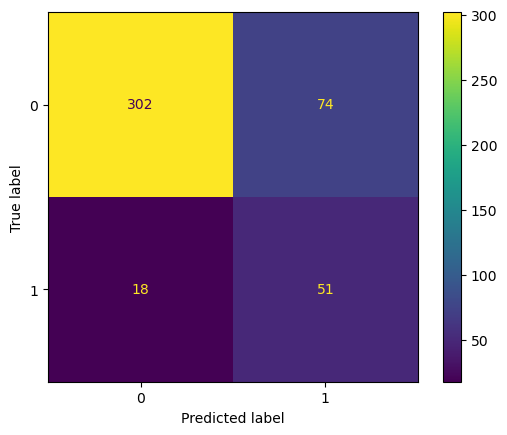

In [14]:
# Calculas la matriz de confusión
cm = confusion_matrix(val_y, pred_final)

# Visualizas la matriz de confusión
ConfusionMatrixDisplay(cm).plot();


### Examinar el mejor modelo

In [15]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=1, class_weight='balanced',
                                    solver='saga'))])

## REPORTING DEL MODELO

### Gain Chart

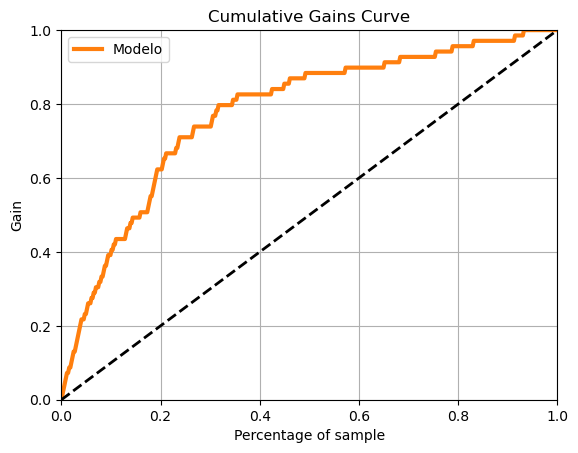

In [16]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### Lift Chart

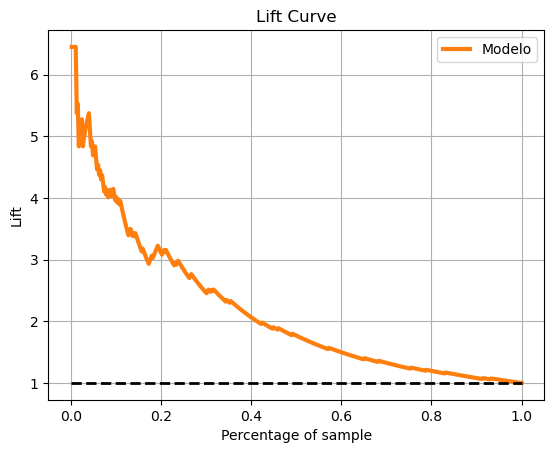

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

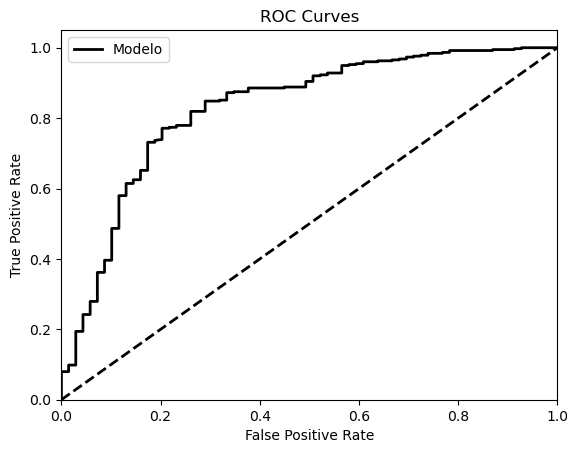

In [18]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();


## Optimización hiperparámetros

### LGBMClassifier

In [40]:
lgb = LGBMClassifier(verbose = -1)

param = { 'max_depth': [2],
         'min_child_samples': [2,3,4],
         'min_child_weight': [22,25,28],
         'learning_rate': [0.06,0.07],
         'n_estimators': [95],
         'is_unbalance' : [True],
         'objective': ['binary']
    
}

grid_search_lgb = GridSearchCV(estimator= lgb, 
                           param_grid = param, 
                           cv =5, 
                           scoring = make_scorer(recall_score, pos_label=1),
                           verbose = 0,
                           n_jobs = -1)

modelo_lgb = grid_search_lgb.fit(train_x,train_y)

df_cv_results_lgb = pd.DataFrame(grid_search_lgb.cv_results_)
df_cv_results_lgb[['mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')[:6]

,mean_test_score,std_test_score,rank_test_score
8,0.76,0.09,1
14,0.76,0.08,1
11,0.76,0.08,1
5,0.76,0.09,1
17,0.76,0.08,1
2,0.76,0.09,1


In [41]:
grid_search_lgb.best_params_

{'is_unbalance': True,
 'learning_rate': 0.06,
 'max_depth': 2,
 'min_child_samples': 2,
 'min_child_weight': 28,
 'n_estimators': 95,
 'objective': 'binary'}

### Predecir sobre validación

In [42]:
pred_lgb = modelo_lgb.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [43]:
roc_lgb = roc_auc_score(val_y, pred_lgb)

print('LGB_ROC_AUC:', roc_lgb)

LGB_ROC_AUC: 0.8413891458526055


### Classification report

In [44]:
pred_final_lgb = modelo_lgb.predict(val_x)

print(classification_report(val_y,pred_final_lgb))


              precision    recall  f1-score   support

           0       0.95      0.77      0.85       376
           1       0.38      0.77      0.51        69

    accuracy                           0.77       445
   macro avg       0.66      0.77      0.68       445
weighted avg       0.86      0.77      0.80       445





### Matriz de confusion

LGBClassifier


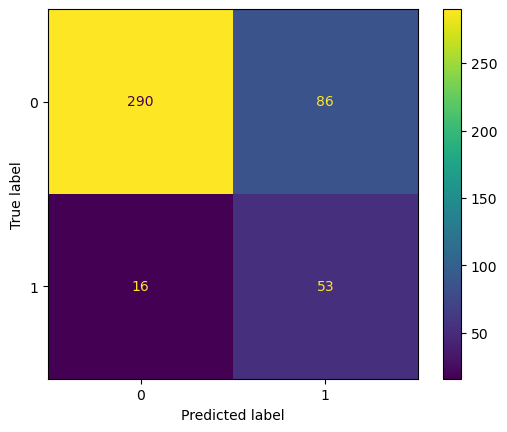

In [45]:
print('LGBClassifier')
cm_lgb = confusion_matrix(val_y, pred_final_lgb)

ConfusionMatrixDisplay(cm_lgb).plot()

## Feature importances

### LGBClassifier

In [46]:
importancias = modelo_lgb.best_estimator_.feature_importances_
nombres_caracteristicas = train_x.columns

importancias_df = pd.DataFrame({
    'Característica': nombres_caracteristicas,
    'Importancia': importancias
})

importancias_df.sort_values(by='Importancia', ascending=False, inplace=True)

print(importancias_df)

            Característica  Importancia
8            total_cmp_mms           46
7    household_members_mms           38
2      mntmeatproducts_mms           31
5    numwebvisitsmonth_mms           31
4    numstorepurchases_mms           30
6         mntgoldprods_mms           25
3             mntwines_mms           23
1  numcatalogpurchases_mms           16
0               income_mms            6


## Guardar modelos

In [31]:
nombre_modelo_log_reg = 'modelo_log_reg.pickle'
ruta_modelo_log_reg = f'{ruta_proyecto}/04_Modelos/{nombre_modelo_log_reg}'

with open(ruta_modelo_log_reg, mode='wb') as file:
    pickle.dump(modelo.best_estimator_, file)

In [32]:
nombre_modelo_lgb_opt = 'modelo_lgb_opt.pickle'
ruta_modelo_lgb_opt = f'{ruta_proyecto}/04_Modelos/{nombre_modelo_lgb_opt}'

with open(ruta_modelo_lgb_opt, mode='wb') as file:
    pickle.dump(modelo_lgb, file)